In [2]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

In [3]:
df_OPA= pd.read_csv(r'C:\Users\user\OneDrive\Desktop\CIS 9660 Group Project\Open_Restaurant_Applications.csv')

In [4]:
df_RI=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\CIS 9660 Group Project\Rodent_Inspection.csv')

In [55]:
#df_OPA.head(10)

In [5]:
df_OPA.shape # Analysis in other file 

(12119, 35)

In [6]:
df_RI.head(5)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13186061,7644998,1,4035770010,4,3577,10,NaN,NaN,11385.0,NaN,NaN,NaN,NaN,Queens,09/23/2020 12:10:39 PM,Rat Activity,09/28/2020 12:07:03 PM,NaN
1,Initial,13185535,7644433,1,3031370001,3,3137,1,NaN,NaN,11206.0,NaN,NaN,NaN,NaN,Brooklyn,09/22/2020 09:43:43 AM,Failed for Other R,09/28/2020 10:55:37 PM,NaN
2,Initial,13185270,7644376,1,4115520091,4,11552,91,NaN,NaN,11417.0,NaN,NaN,NaN,NaN,Queens,09/22/2020 08:34:00 AM,Failed for Other R,09/28/2020 01:09:16 PM,NaN
3,Initial,13185931,7644978,1,3033160032,3,3316,32,NaN,NaN,11237.0,NaN,NaN,NaN,NaN,Brooklyn,09/23/2020 10:31:32 AM,Passed,09/28/2020 10:55:25 PM,NaN
4,Initial,13186672,7644397,1,3031870055,3,3187,55,131,STARR STREET,11237.0,1005046.0,195490.0,40.70322,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity,09/28/2020 10:54:48 PM,"(40.703220245028, -73.924996432938)"


In [32]:
df_RI.shape 

(1916105, 20)

In [44]:
names=df_RI.columns
names

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [ ]:
#BBL: Borough, Block, and Lot code, which is a unique identifier of NYC Taxlots. 
# Every NYC property has its own BBL code, and inspections are conducted at the taxlot level. 
# This dataset can be mapped by joining these inspectional results to a taxlot geography file 
# such as the Department of City Planning’s PLUTO dataset.

In [ ]:
# Result of the inspection, including: Active Rat Signs (ARS) - ARS include any of six different signs: 
# 1) fresh tracks, 2) fresh droppings, 3) active burrows, 4) active runways and rub marks, 5) fresh gnawing marks, 
# and 6) live rats. Problem Conditions - Problem conditions include garbage 
# (poor containerization of food waste resulting in the feeding of rats), 
# harborage (clutter and dense vegetation promoting the nesting of rats), and mice.

In [7]:
df_RI.isnull().sum()

INSPECTION_TYPE                    0
JOB_TICKET_OR_WORK_ORDER_ID        0
JOB_ID                             0
JOB_PROGRESS                       0
BBL                                0
BORO_CODE                          0
BLOCK                              0
LOT                                0
HOUSE_NUMBER                   46219
STREET_NAME                     3041
ZIP_CODE                       10193
X_COORD                        59905
Y_COORD                        59905
LATITUDE                        3640
LONGITUDE                       3640
BOROUGH                            0
INSPECTION_DATE                   17
RESULT                             6
APPROVED_DATE                    131
LOCATION                        4270
dtype: int64

In [11]:
df_RI[['ZIP_CODE','BOROUGH','RESULT']]

,ZIP_CODE,BOROUGH,RESULT
0,11385.0,Queens,Rat Activity
1,11206.0,Brooklyn,Failed for Other R
2,11417.0,Queens,Failed for Other R
3,11237.0,Brooklyn,Passed
4,11237.0,Brooklyn,Rat Activity
...,...,...,...
1916100,11219.0,Brooklyn,Passed
1916101,10452.0,Bronx,Passed
1916102,10028.0,Manhattan,Failed for Other R
1916103,10453.0,Bronx,Stoppage done


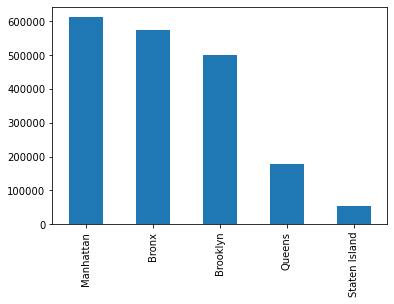

Manhattan        612621
Bronx            572983
Brooklyn         499545
Queens           177067
Staten Island     53889
Name: BOROUGH, dtype: int64

In [18]:
df_RI['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_inspection_count=df_RI['BOROUGH'].value_counts()
region_inspection_count

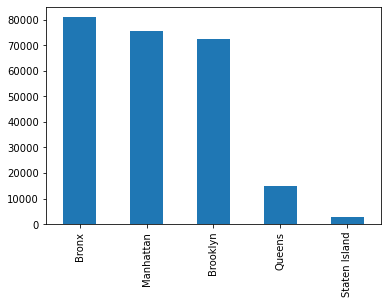

Bronx            80963
Manhattan        75608
Brooklyn         72450
Queens           15097
Staten Island     2813
Name: BOROUGH, dtype: int64

In [16]:
df_RI[df_RI["RESULT"]=='Rat Activity']['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_RI[df_RI["RESULT"]=='Rat Activity']['BOROUGH'].value_counts()
region_activity_count

In [63]:
borough_count=df_RI['BOROUGH'].value_counts()
borough_count

Manhattan        612621
Bronx            572983
Brooklyn         499545
Queens           177067
Staten Island     53889
Name: BOROUGH, dtype: int64

Bronx            0.141301
Brooklyn         0.145032
Manhattan        0.123417
Queens           0.085262
Staten Island    0.052200
Name: BOROUGH, dtype: float64

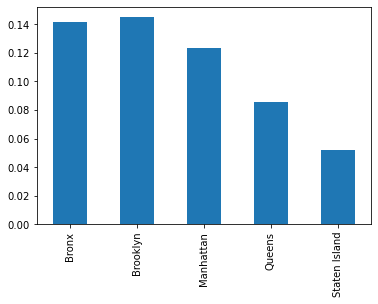

In [74]:
Rat_activity_rate=region_activity_count/borough_count
Rat_activity_rate.plot(kind='bar')
Rat_activity_rate

In [65]:
df_RI['RESULT'].value_counts()

Passed                1195180
Bait applied           248144
Rat Activity           246931
Failed for Other R     191456
Monitoring visit        32614
Cleanup done             1564
Stoppage done             210
Name: RESULT, dtype: int64